# David Bowie - Changes (2nd Way)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings                                                     
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../data/train.csv')

# Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59288 entries, 0 to 59287
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      59288 non-null  int64  
 1   log_price               59288 non-null  float64
 2   property_type           59288 non-null  object 
 3   room_type               59288 non-null  object 
 4   amenities               59288 non-null  object 
 5   accommodates            59288 non-null  int64  
 6   bathrooms               59139 non-null  float64
 7   bed_type                59288 non-null  object 
 8   cancellation_policy     59288 non-null  object 
 9   cleaning_fee            59288 non-null  bool   
 10  city                    59288 non-null  object 
 11  description             59288 non-null  object 
 12  first_review            46601 non-null  object 
 13  host_has_profile_pic    59148 non-null  object 
 14  host_identity_verified  59148 non-null

In [4]:
columns_to_drop = ['id', 'thumbnail_url', 'host_response_rate', 'neighbourhood', 'zipcode', 'first_review', 'last_review', 'name']
df.drop(columns=columns_to_drop, inplace=True)

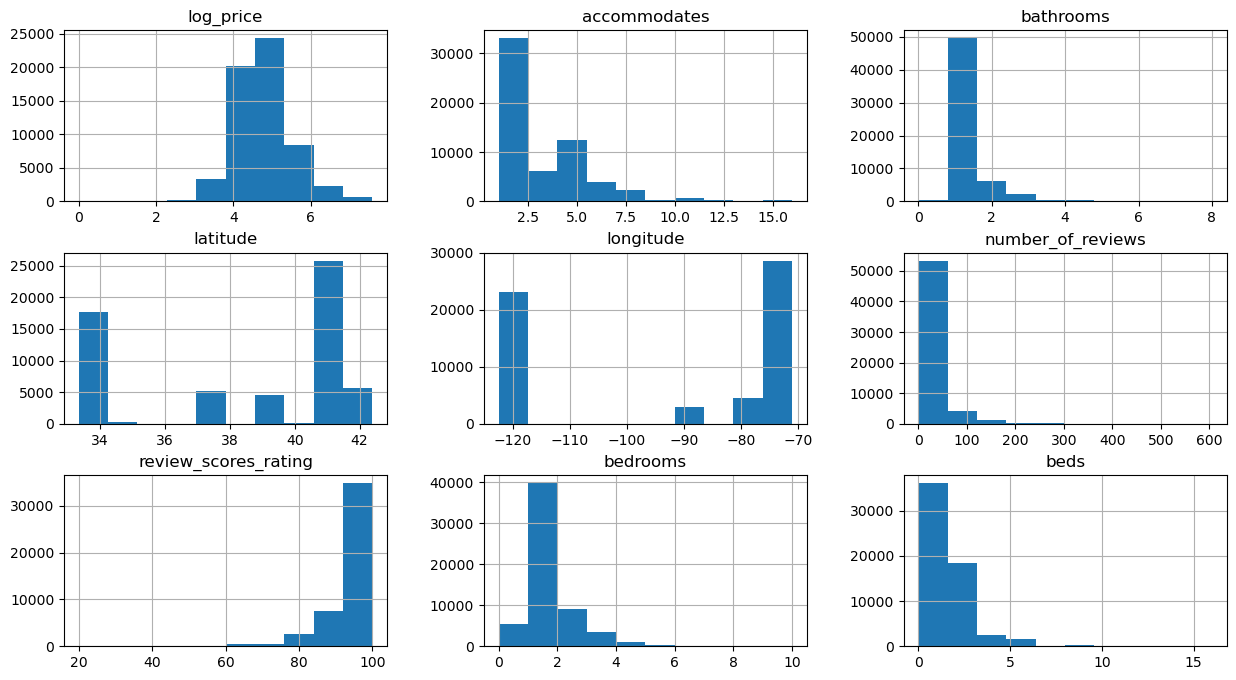

In [5]:
df.hist(figsize = (15, 8));

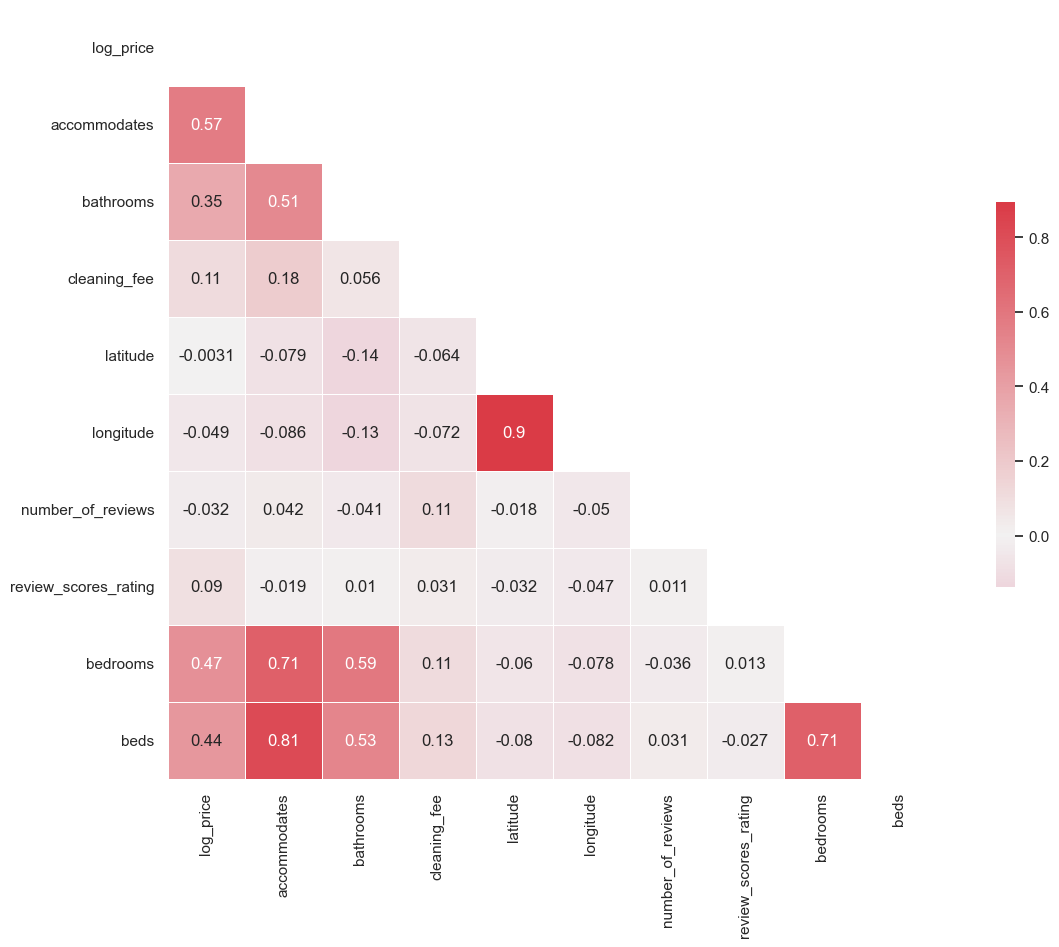

In [6]:
plt.figure(figsize=(15, 10))   

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(df.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Pre-processing

## Categorical columns

In [7]:
def unique_values_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    for column in categorical_columns:
        unique_vals = df[column].nunique()
        print(f"'{column}' -------- {unique_vals}")

unique_values_categorical_columns(df)

'property_type' -------- 34
'room_type' -------- 3
'amenities' -------- 54242
'bed_type' -------- 5
'cancellation_policy' -------- 5
'city' -------- 6
'description' -------- 58873
'host_has_profile_pic' -------- 2
'host_identity_verified' -------- 2
'host_since' -------- 3053
'instant_bookable' -------- 2


We drop columns with too many unique values that cannot be treated, in this case only description

In [9]:
df.drop('description', axis=1, inplace=True)

Host_since can be changed to only have the year

In [8]:
df['host_since'] = df['host_since'].apply(lambda x: 0 if pd.isnull(x) else int(x.split('-')[0]))

Manual one_hot encoding of amenities

In [10]:
# a list with all amenities
amenilist = ['"Air conditioning"',
 '"Family/kid friendly"',
 '"Wireless Internet"',
 'Essentials',
 'Hangers',
 'Internet',
 'Iron',
 'Kitchen',
 'Shampoo',
 'TV']

In [11]:
for e in amenilist:
    df[e] = df.amenities.apply(lambda x: 1 if e in x else 0)

In [17]:
df.drop('amenities', axis=1, inplace=True)

Property_type has too many unique values but not a lot to just drop it, so we will choose the top_10 properties.

In [15]:
top_10 = ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft',
         'Guesthouse', 'Bed & Breakfast', 'Bungalow', 'Villa', 'Dorm']

df.property_type = df.property_type.apply(lambda x: x if x in top_10 else 'Other')

Change the ones with 2 values to 1 and 0

In [23]:
df.host_has_profile_pic = df.host_has_profile_pic.apply(lambda x: 1 if x == 't' else 0)
df.host_identity_verified = df.host_identity_verified.apply(lambda x: 1 if x == 't' else 0)
df.instant_bookable = df.instant_bookable.apply(lambda x: 1 if x == 't' else 0)

And one hot encode everything else

In [24]:
unique_values_categorical_columns(df)

'property_type' -------- 11
'room_type' -------- 3
'bed_type' -------- 5
'cancellation_policy' -------- 5
'city' -------- 6


In [25]:
df = pd.get_dummies(df,
                          columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'],
                          drop_first=True)